<a href="https://colab.research.google.com/github/bhuvana-ak/bhuvana-ak/blob/main/DW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##
1. Loading teh file
2. EDA
3. Data Pre processing
4. Feature Engineering
5. Model - Linear Regression Model
6. Evaluation

In [ ]:
import pandas as pd



#Data Loading and analysis

In [ ]:
data = pd.read_csv("/content/Copy of example_brand_deals_interview - final_brand_deals.csv")

In [ ]:
data.head()

,Influencer,Profile Link,Platform ID,Description,Post Count,Followers,Est. Views,Est. Likes,Est. Comments,Est. Price,Cost,Views,Likes,Comments,Clicks,Conversions,Revenue,Last Posted At
0,Cravoo,https://www.youtube.com/channel/UCuvNSqwK_Hnpd...,UCuvNSqwK_HnpdYBKosZfStg,- 🎥 Content: The channel focuses on entertaini...,3,41400.0,68100,2628,150,"$1,786",$460,58864,2179,144,350,20,$662,11/01/2024
1,n3rmin,https://www.youtube.com/channel/UCYTO_kuA1_dpT...,UCYTO_kuA1_dpTRKwFDZiL0Q,- The channel creates content around relatable...,3,99300.0,287178,20316,1392,"$10,626",$800,95559,7558,387,342,1,$32,10/31/2024
2,OlderBrother,https://www.youtube.com/channel/UCfdJHuE6uGprt...,UCfdJHuE6uGprtdzGgSDNHTA,- 🎥 **Content Focus**: The channel creates eng...,3,38300.0,78819,5679,207,"$1,984",$280,15748,1166,57,119,2,$61,10/30/2024
3,Eighteen Lifestyle,https://www.youtube.com/channel/UCdsO2HmyWVXgS...,UCdsO2HmyWVXgSFUJn62vqWg,- 🎥 Specializes in Men's Fashion content in Ma...,3,47400.0,17133,1233,90,$438,$120,15139,1069,90,177,1,$35,10/26/2024
4,Noluvvaj,https://www.youtube.com/channel/UC--c1ZDbwiGMF...,UC--c1ZDbwiGMFlNpjF-IBUA,- 🐒 Specializes in entertaining content around...,4,63900.0,109664,7184,232,"$3,133",$400,105339,7193,242,36,2,$65,10/15/2024


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Influencer      495 non-null    object 
 1   Profile Link    495 non-null    object 
 2   Platform ID     495 non-null    object 
 3   Description     335 non-null    object 
 4   Post Count      495 non-null    int64  
 5   Followers       494 non-null    float64
 6   Est. Views      495 non-null    int64  
 7   Est. Likes      495 non-null    int64  
 8   Est. Comments   495 non-null    int64  
 9   Est. Price      495 non-null    object 
 10  Cost            495 non-null    object 
 11  Views           495 non-null    int64  
 12  Likes           495 non-null    int64  
 13  Comments        495 non-null    int64  
 14  Clicks          495 non-null    int64  
 15  Conversions     495 non-null    int64  
 16  Revenue         495 non-null    object 
 17  Last Posted At  477 non-null    obj

In [ ]:
data.describe()

,Post Count,Followers,Est. Views,Est. Likes,Est. Comments,Views,Likes,Comments,Clicks,Conversions
count,495.000000,4.940000e+02,4.950000e+02,495.000000,495.000000,4.950000e+02,4.950000e+02,495.000000,495.000000,495.000000
mean,12.315152,6.692645e+05,6.254581e+05,24617.018182,3351.773737,1.307389e+06,5.524214e+04,4389.795960,1716.242424,165.789899
std,41.603897,1.216515e+06,2.335813e+06,86753.334305,14448.985516,4.524676e+06,1.859572e+05,17740.094576,7003.813909,1367.087573
min,0.000000,8.210000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,-2.000000e+00,-1.000000,0.000000,0.000000
25%,2.000000,1.060000e+05,2.289700e+04,1005.000000,117.500000,3.942650e+04,1.756500e+03,144.500000,5.000000,1.000000
50%,3.000000,2.865000e+05,9.117200e+04,3565.000000,364.000000,1.554970e+05,6.282000e+03,462.000000,68.000000,6.000000
75%,8.000000,6.930000e+05,3.006050e+05,13717.500000,1318.500000,6.191250e+05,2.563550e+04,1771.000000,564.500000,32.500000
max,737.000000,9.930000e+06,2.749962e+07,914409.000000,150164.000000,6.309399e+07,2.497874e+06,278618.000000,108785.000000,29486.000000


In [ ]:
data['Platform ID'].value_counts()

,count
Platform ID,
UCuvNSqwK_HnpdYBKosZfStg,1
UCoviXqo4b1MAAkjRWEPJrBg,1
UCC_w8GsmIp-6dHhdVHqcVgg,1
UCivWDZJOYdrHeSUqsiKSk6w,1
UCnD4jogYqIgUWY1ZYPU-Dew,1
...,...
UCd2hmzAHxclueNMFVz6he8w,1
UC6eG4UZh5uQTzoAKULHOWdQ,1
UCPhIRoioc4aJ_QDdf2m38wA,1


In [ ]:
# remove duplicate platform Ids
data = data.drop_duplicates(subset='Platform ID')

In [ ]:
# generate unique Id as influencer id
data['Influencer_ID']=data.index + 1

<ipython-input-19-980b0ebbede0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Influencer_ID']=data.index + 1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 494
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Influencer      491 non-null    object 
 1   Profile Link    491 non-null    object 
 2   Platform ID     491 non-null    object 
 3   Description     333 non-null    object 
 4   Post Count      491 non-null    int64  
 5   Followers       490 non-null    float64
 6   Est. Views      491 non-null    int64  
 7   Est. Likes      491 non-null    int64  
 8   Est. Comments   491 non-null    int64  
 9   Est. Price      491 non-null    int64  
 10  Cost            491 non-null    int64  
 11  Views           491 non-null    int64  
 12  Likes           491 non-null    int64  
 13  Comments        491 non-null    int64  
 14  Clicks          491 non-null    int64  
 15  Conversions     491 non-null    int64  
 16  Revenue         491 non-null    int64  
 17  Last Posted At  477 non-null    object 


In [ ]:
# convert the columns with $ amount to int values
data["Est. Price"] = data["Est. Price"].str.replace("$", "").str.replace(",", "").astype(int)
data["Revenue"] = data["Revenue"].str.replace("$", "").str.replace(",", "").astype(int)
data["Cost"] = data["Cost"].str.replace("$", "").str.replace(",", "").astype(int)

<ipython-input-23-29f1c6ae7f73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Revenue"] = data["Revenue"].str.replace("$", "").str.replace(",", "").astype(int)
<ipython-input-23-29f1c6ae7f73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cost"] = data["Cost"].str.replace("$", "").str.replace(",", "").astype(int)


##EDA

Text(0.5, 1.0, 'Correlation Heatmap')

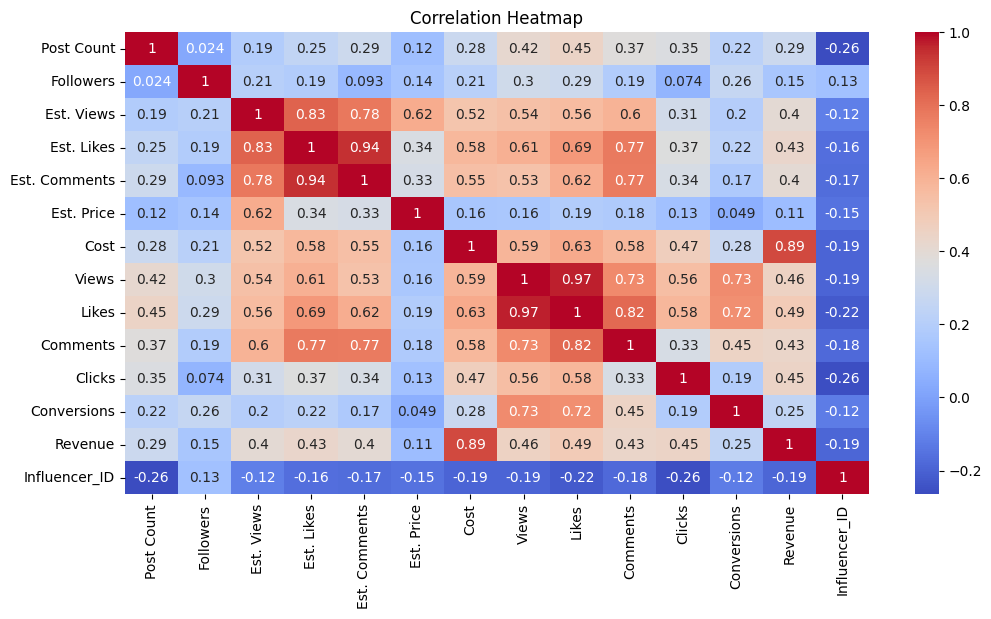

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Data Pre-Processing

In [ ]:
# Rename all the columns to have _
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('.', '')


In [ ]:
data.columns

Index(['Influencer', 'Profile_Link', 'Platform_ID', 'Description',
       'Post_Count', 'Followers', 'Est_Views', 'Est_Likes', 'Est_Comments',
       'Est_Price', 'Cost', 'Views', 'Likes', 'Comments', 'Clicks',
       'Conversions', 'Revenue', 'Last_Posted_At', 'Influencer_ID'],
      dtype='object')

In [ ]:
# standard scaler to std values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Influencer_ID', 'Post_Count', 'Followers','Est_Views', 'Est_Likes', 'Est_Comments',
       'Est_Price', 'Cost', 'Views', 'Likes', 'Comments', 'Clicks']] = scaler.fit_transform(data[['Influencer_ID', 'Post_Count', 'Followers','Est_Views', 'Est_Likes', 'Est_Comments',
       'Est_Price', 'Cost', 'Views', 'Likes', 'Comments', 'Clicks']])


In [ ]:
# Create the dependet and independent variable dataframes
X = data[['Influencer_ID', 'Post_Count', 'Followers','Est_Views', 'Est_Likes', 'Est_Comments',
       'Est_Price', 'Cost', 'Views', 'Likes', 'Comments', 'Clicks']]
Y = data['Revenue']

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Fit a Randomforest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Define a regreesion Model
RandomForestRegressor = RandomForestRegressor(n_estimators=100, random_state=42)
model = RandomForestRegressor.fit(X_train, Y_train)

score = model.score(X_train, Y_train)
print("R-squared:", score)



R-squared: 0.9464641854892838


In [ ]:
# Prediction or Evaluation
predictiction = model.predict(X_test)
mse = mean_squared_error(Y_test, predictiction)
r2 = r2_score(Y_test, predictiction)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.9032669186405937
R-squared: 0.6335152198466814
